In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
#Melihat isi database olist
conn = sqlite3.connect('olist.db')
list_table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(list_table)

                                name
0            olist_customers_dataset
1          olist_geolocation_dataset
2          olist_order_items_dataset
3       olist_order_payments_dataset
4        olist_order_reviews_dataset
5               olist_orders_dataset
6             olist_products_dataset
7              olist_sellers_dataset
8  product_category_name_translation


memilih tabel yang akan digunakan dan disimpan dalam data frame berdasarkan objektif

In [3]:
#Membaca dan mengambil data dari database
conn = sqlite3.connect('olist.db')
df1 = 'SELECT * FROM olist_customers_dataset' 
customers = pd.read_sql(df1, conn)

df3 = 'SELECT * FROM olist_order_items_dataset' 
order_items = pd.read_sql(df3, conn)

df4 = 'SELECT * FROM olist_order_payments_dataset' 
order_payments = pd.read_sql(df4, conn)

df5 = 'SELECT * FROM olist_order_reviews_dataset' 
order_reviews = pd.read_sql(df5, conn)

df6 = 'SELECT * FROM olist_orders_dataset'
order = pd.read_sql(df6, conn)

df7 = 'SELECT * FROM olist_products_dataset'
products = pd.read_sql(df7, conn)

df8  = 'SELECT * FROM product_category_name_translation'
product_category = pd.read_sql(df8, conn)



# CLEANING DATA

### Tabel Customers

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#cek info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [6]:
# Mengecek missing values di data frame customer
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# Mengecek duplikat di data frame customer
customers.duplicated().sum()

0

### Tabel order_items

In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
#cek info
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   order_id             112650 non-null  object
 1   order_item_id        112650 non-null  object
 2   product_id           112650 non-null  object
 3   seller_id            112650 non-null  object
 4   shipping_limit_date  112650 non-null  object
 5   price                112650 non-null  object
 6   freight_value        112650 non-null  object
dtypes: object(7)
memory usage: 6.0+ MB


In [10]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
order_items['price'] = order_items['price'].astype('float64')

In [53]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.0+ MB


In [11]:
# Mengecek missing values di data frame customer
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
# Mengecek duplikat di data frame customer
order_items.duplicated().sum()

0

### Tabel order_payments

In [13]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
#cek info
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   order_id              103886 non-null  object
 1   payment_sequential    103886 non-null  object
 2   payment_type          103886 non-null  object
 3   payment_installments  103886 non-null  object
 4   payment_value         103886 non-null  object
dtypes: object(5)
memory usage: 4.0+ MB


In [15]:
# Mengubah tipe data kolom 'payment_value' menjadi float64
order_payments['payment_value'] = order_payments['payment_value'].astype(float)

In [16]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


In [17]:
# Mengecek missing values di data frame customer
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
# Mengecek duplikat di data frame customer
order_payments.duplicated().sum()

0

### Tabel order_reviews

In [19]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [20]:
#cek info
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99503 entries, 0 to 99502
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99503 non-null  object
 1   order_id                 99503 non-null  object
 2   review_score             99503 non-null  object
 3   review_comment_title     99503 non-null  object
 4   review_comment_message   99503 non-null  object
 5   review_creation_date     99503 non-null  object
 6   review_answer_timestamp  99503 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [21]:
# Mengubah kolom "review_creation_date" menjadi datetime
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [22]:
# Mengecek missing values di data frame customer
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [23]:
# Mengecek duplikat di data frame customer
order_reviews.duplicated().sum()

212

In [24]:
#identifikasi duplikat
order_reviews[order_reviews.duplicated(keep=False)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,,,2018-04-13,2018-04-16 00:39:37
...,...,...,...,...,...,...,...
551,b83ba2a97932a8a661f5bf8eac7642bd,f464bdc3b17c2085e54b66d8e5ae1695,5,,sempre comprei no stark e estou satisfeito.,2017-05-31,2017-06-01 13:56:37
553,31a346e6f2cf783b145080e2f4dc6e32,35ff30856e32d0b5a4a2abe36bc26f4e,4,,,2017-10-22,2017-10-24 18:12:08
554,68c49ef4957e7d9d5ce406058b4848c3,fc24b77521e400e8290a902026efcc85,4,,,2017-08-08,2017-08-11 10:31:24
556,dd9696ded8cb3022c952eadcc83432e9,da56c7c0b595c544c33fa7d3ea80de80,5,,,2018-04-28,2018-04-28 19:48:47


pada tabel order_reviews terdapat duplikat karena pada kolom review_score terdapat beberapa reviewer yang memberi skor yang sama

### Tabel orders

In [25]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
#cek info
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
# Mengubah tipe data kolom menjadi timestamp (datetime)
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

In [28]:
# Mengecek missing values di data frame customer
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [56]:
order['order_approved_at'].interpolate(method='pad', inplace=True)
order['order_delivered_carrier_date'].interpolate(method='pad', inplace=True)
order['order_delivered_customer_date'].interpolate(method='pad', inplace=True)


In [57]:
# Mengecek missing values di data frame customer
order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [29]:
# Mengecek duplikat di data frame customer
order.duplicated().sum()

0

### Tabel products

In [30]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [31]:
#cek info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  object
 3   product_description_lenght  32951 non-null  object
 4   product_photos_qty          32951 non-null  object
 5   product_weight_g            32951 non-null  object
 6   product_length_cm           32951 non-null  object
 7   product_height_cm           32951 non-null  object
 8   product_width_cm            32951 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [32]:
# Mengecek missing values di data frame customer
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
# Mengecek duplikat di data frame customer
products.duplicated().sum()

0

### Tabel product_category

In [34]:
product_category.head()

,ï»¿product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [35]:
#cek info
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ï»¿product_category_name       71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
# Mengganti nama kolom product_category_name menjadi new_product_category_name
product_category.rename(columns={'ï»¿product_category_name': 'product_category_name'}, inplace=True)

In [37]:
# Mengecek missing values di data frame customer
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
# Mengecek duplikat di data frame customer
product_category.duplicated().sum()

0

# Analisis


### 1.	Analisis Data Penjualan Berdasarkan Wilayah Geografis

In [39]:
#menggabungkan tabel customers dan orders
merged_1 = pd.merge(customers, order, on= 'customer_id')

In [40]:
#membuat tabel 5 kota dengan pemesanan terbanyak
top5_largest_orders = merged_1.groupby('customer_city').agg({'order_id': 'count'}).nlargest(10, 'order_id').reset_index()
top5_largest_orders

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


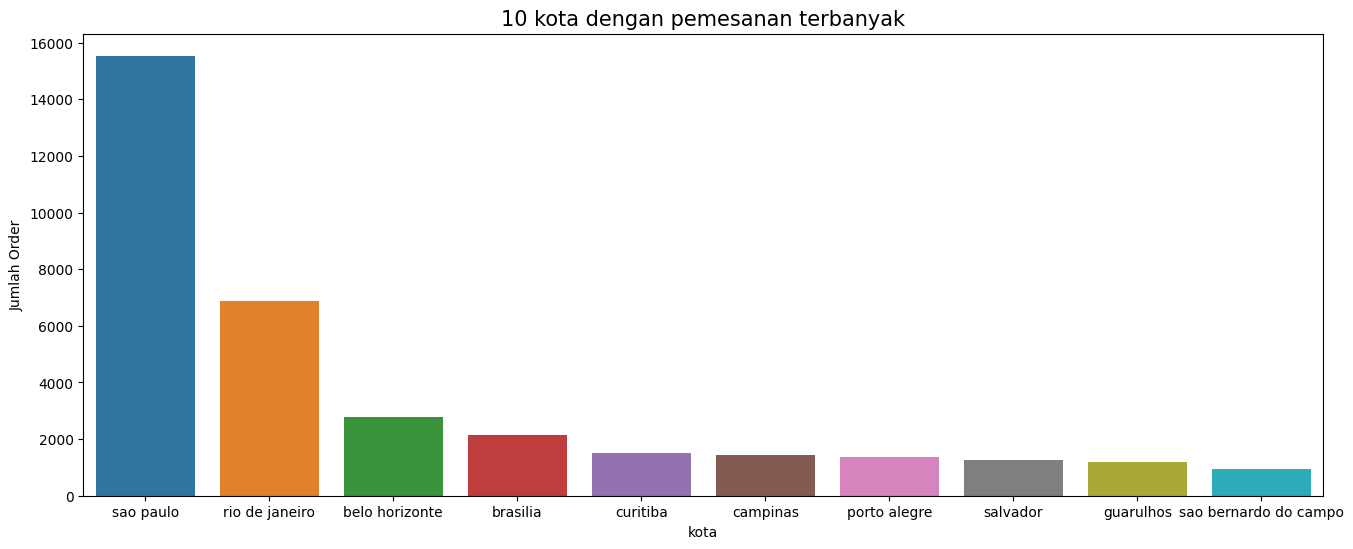

In [41]:
#membuat visualisasi 


fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(data=top5_largest_orders, x='customer_city', y='order_id')
plt.title('10 kota dengan pemesanan terbanyak', fontsize= 15)
plt.xlabel('kota')
plt.ylabel('Jumlah Order')
plt.show()

### 2.	Analisis Produk Terlaris dalam Kategori produk 

In [42]:
#menggabungkan kolom orders, order_items, products dan product category name translation
merge_2 = pd.merge(order,order_items, on= 'order_id')
merge_3 = pd.merge(merge_2,products, on= 'product_id')
merge_4 = pd.merge(merge_3,product_category, on= 'product_category_name', suffixes=('_order_items', '_product_category' ))

In [43]:
# Mengelompokkan data berdasarkan 'product_category_name_englis' dan menghitung jumlah item terjual
product_sales = merge_4.groupby('product_category_name_english')['order_item_id'].count().reset_index()

In [44]:
# Mengurutkan produk terlaris secara menurun
grouping_Produk_Terlaris = product_sales.sort_values(by='order_item_id', ascending=False)
top_10= grouping_Produk_Terlaris.nlargest(10,'order_item_id')
top_10


,product_category_name_english,order_item_id
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


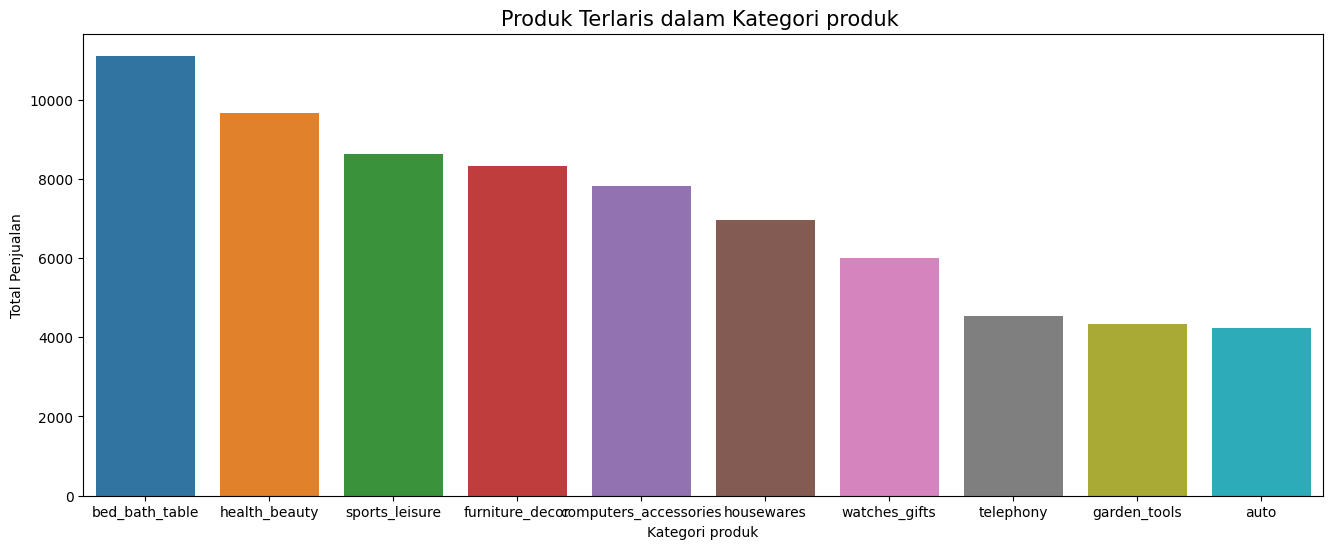

In [45]:
# membuat visualisasi

plt.figure(figsize=(16, 6))
sns.barplot(data=top_10, x='product_category_name_english', y='order_item_id')
plt.title('Produk Terlaris dalam Kategori produk ', fontsize= 15)
plt.xlabel('Kategori produk')
plt.ylabel('Total Penjualan')
plt.show()

### 3.	Analisis Kepuasan Pelanggan Berdasarkan Penilaian

In [46]:
penilaian = pd.merge(order_reviews, order, on='order_id', how='inner')

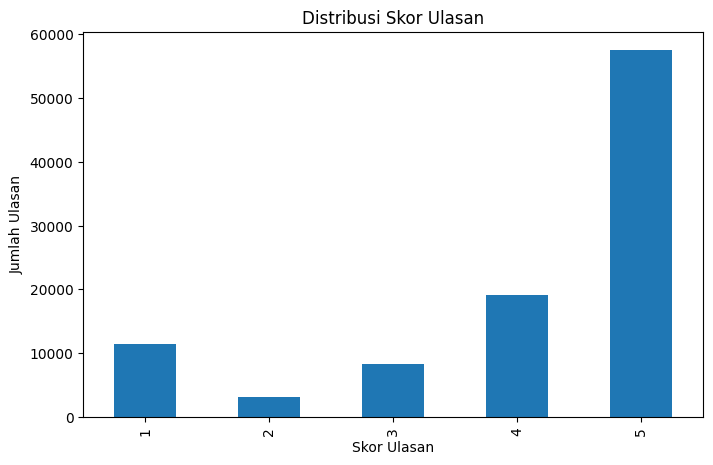

In [47]:
# Analisis distribusi skor ulasan
plt.figure(figsize=(8, 5))
penilaian['review_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Skor Ulasan')
plt.show()

Kesimpulannya, distribusi skor ulasan ini menunjukkan bahwa sebagian besar pelanggan puas, tetapi ada ruang untuk perbaikan dalam layanan untuk mengatasi pelanggan yang memberikan skor rendah.


### 4.	Analisis tren penjualan dari bulan ke bulan

In [48]:
#Menggabungkan kolom orders, payments dan order items
merge_order = pd.merge(order,order_items, on= 'order_id')
merge_order = pd.merge(merge_order, order_payments, on= 'order_id')

#memilih kolom kolom yang ditampilkan
penjualan = merge_order[['order_id','order_status','order_purchase_timestamp','price','freight_value','payment_type','payment_value']]
penjualan.head(5)

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,118.70,22.76,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,159.90,19.22,credit_card,179.12


In [49]:
#menambahkan kolom month
merge_order['month'] = merge_order['order_purchase_timestamp'].dt.to_period('M')

#grouping
total_penjualan = merge_order.groupby('month')['payment_value'].sum()
penjualan_perbulan = total_penjualan.reset_index()
penjualan_perbulan.columns = ['Bulan', 'Total_Penjualan']
penjualan_perbulan['Bulan'] = penjualan_perbulan['Bulan'].dt.to_timestamp()
penjualan_perbulan

,Bulan,Total_Penjualan
0,2016-09-01,347.52
1,2016-10-01,73914.58
2,2016-12-01,19.62
3,2017-01-01,187779.41
4,2017-02-01,344134.79
5,2017-03-01,526961.66
6,2017-04-01,505665.53
7,2017-05-01,724504.55
8,2017-06-01,600753.27
9,2017-07-01,737293.08


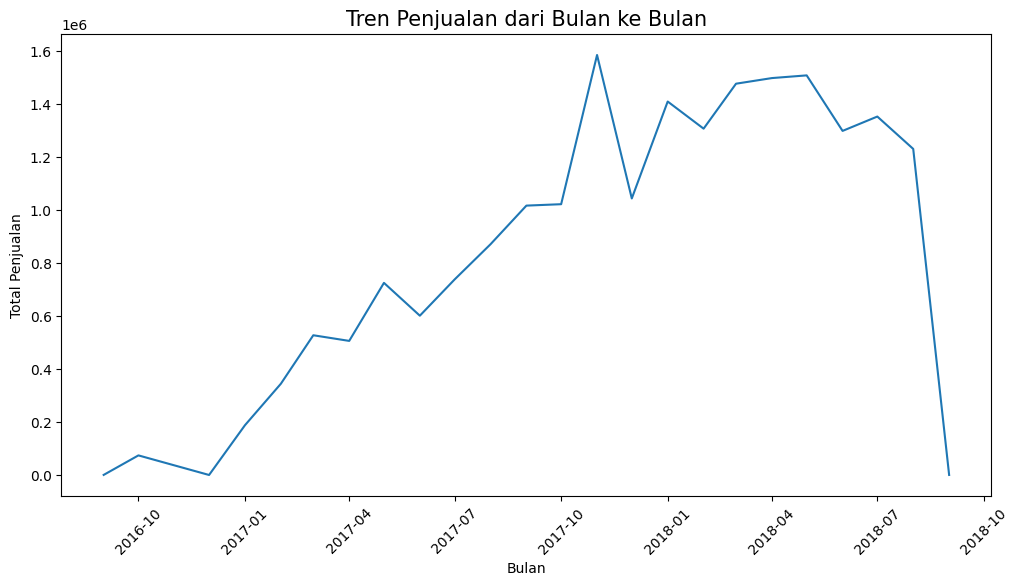

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=penjualan_perbulan, x='Bulan', y='Total_Penjualan')
plt.title('Tren Penjualan dari Bulan ke Bulan', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

### 5.	Analisis  Pembayaran dan Metode Pembayaran Terpopuler

In [51]:
# grouping tabel payments
pembayaran_populer = order_payments.groupby('payment_type').agg({'order_id':'count'}).reset_index().sort_values(by= 'order_id', ascending=False)
pembayaran_populer

,payment_type,order_id
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


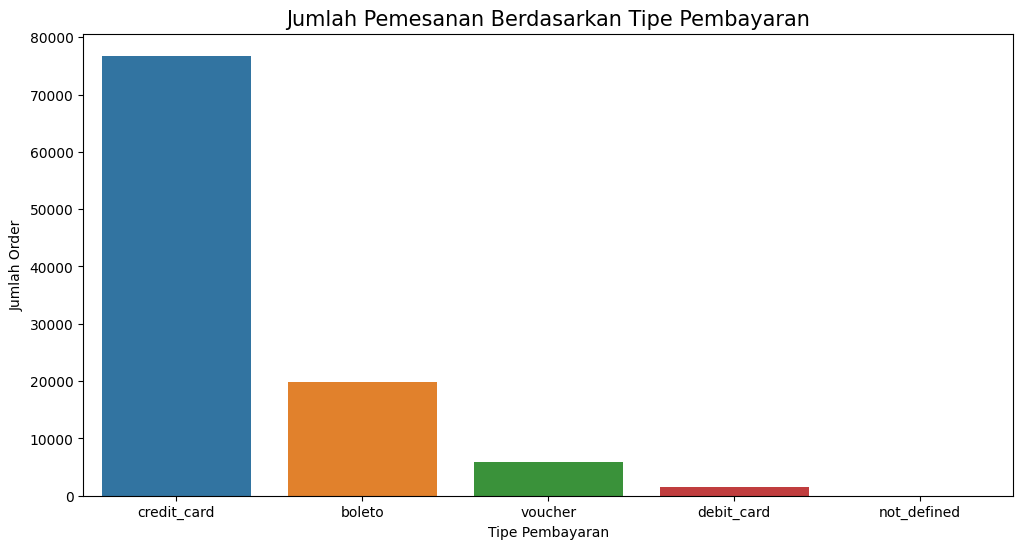

In [52]:
# membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=pembayaran_populer, x='payment_type', y='order_id')
plt.title('Jumlah Pemesanan Berdasarkan Tipe Pembayaran', fontsize= 15)
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Order')
plt.show()